In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read through the csv file and store in the variable called ' rentData'
rentData = pd.read_csv('House_Rent_Dataset.csv', encoding='latin-1')

rentData.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [125]:
#getting a copy to diplay charts
initialRentData = pd.read_csv('House_Rent_Dataset.csv', encoding='latin-1')

# Some high-level info about the dataset

In [4]:
#View some basic info related to the columns
rentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
#As per the above there are 4 numeric columns and 8 object type colums
#no null values

#View some statistics of the numeric columns
rentData.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [6]:
print('The shape of our dataset is:', rentData.shape)

The shape of our dataset is: (4746, 12)


# Analyse the Columns, Preprocessing and Feature Engineering

In [7]:
#view the unique values of each columns to preprocessing
rentData.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [8]:
rentData.describe

<bound method NDFrame.describe of        Posted On  BHK   Rent  Size            Floor    Area Type   
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area  \
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred   
0                       Bandel    Kolkata       Unfurnished  Bachelo

In [133]:
# define colors
colors = ['#4C65B0', '#C44E44', '#55A833', '#8154B2', '#CCB952', '#64B5BD', '#FFE5C6', '#FFE3C5']

# Col1 - PostedOn

In [9]:
#let's look at the first object type column, which is Posted On
rentData['Posted On'].value_counts()

Posted On
2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: count, Length: 81, dtype: int64

In [10]:
#All records are related to the 2022, therefore, there is no considerable amount of impact to predict the rent
#we can drop the postedOn column
rentData = rentData.drop('Posted On', axis=1)

In [13]:
rentData.shape

(4746, 11)

In [14]:
rentData.head(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Col2 - BHK (Number of Bedrooms, Hall, Kitchen)

In [15]:
rentData['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

In [ ]:
#Since there are only 06 unqiue values, no need to modify further

# Col3 - Rent (Going to predict)

In [17]:
rentData['Rent'].value_counts()

Rent
15000    275
10000    248
12000    238
20000    175
8000     162
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: count, Length: 243, dtype: int64

In [18]:
#As we can see, there are only 1 record for some values which will leads to overfit the model
#so it's better to remove those kind of rows for better performance

In [19]:
#view top 5 lowest values for rent
rentData['Rent'].sort_values(ascending=True)[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

In [20]:
# Let's see the rows less than 2200 
rentData[rentData['Rent'] < 2200]

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
285,1,1500,200,Ground out of 2,Super Area,Santoshpur,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
471,1,1800,500,Ground out of 1,Super Area,Shyam Bazar,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2475,2,2000,60,1 out of 1,Super Area,Ram Nagar,Delhi,Unfurnished,Bachelors/Family,1,Contact Owner
4076,3,1200,2100,1 out of 3,Carpet Area,"Uppal, NH 2 2",Hyderabad,Furnished,Bachelors/Family,3,Contact Owner


In [21]:
rentData.shape

(4746, 11)

In [22]:
# Since the dataset contains more than 4000 records, these seems to be outliers
#therefore, let's delete these suspicious rows

rentData.drop(285, axis=0, inplace=True)
rentData.drop(471, axis=0, inplace=True)
rentData.drop(2475, axis=0, inplace=True)
rentData.drop(4076, axis=0, inplace=True)

In [23]:
rentData.shape

(4742, 11)

In [24]:
#view top 5 max values for rent
rentData['Rent'].sort_values(ascending=False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [25]:
# Let's see the rows max than 700000 
rentData[rentData['Rent'] > 700000]

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
827,4,1000000,3064,18 out of 45,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent
1001,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
1329,4,850000,3200,2 out of 4,Carpet Area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4,Contact Agent
1837,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent


In [26]:
# Since the dataset contains more than 4000 records, these seems to be outliers
#therefore, let's delete these suspicious rows

rentData.drop(827, axis=0, inplace=True)
rentData.drop(1001, axis=0, inplace=True)
rentData.drop(1329, axis=0, inplace=True)
rentData.drop(1837, axis=0, inplace=True)

In [27]:
rentData.shape

(4738, 11)

# Col4 - Size

In [28]:
#Statistical data of the Size column
rentData['Size'].describe()

count    4738.000000
mean      965.615661
std       629.574955
min        10.000000
25%       550.000000
50%       850.000000
75%      1200.000000
max      8000.000000
Name: Size, dtype: float64

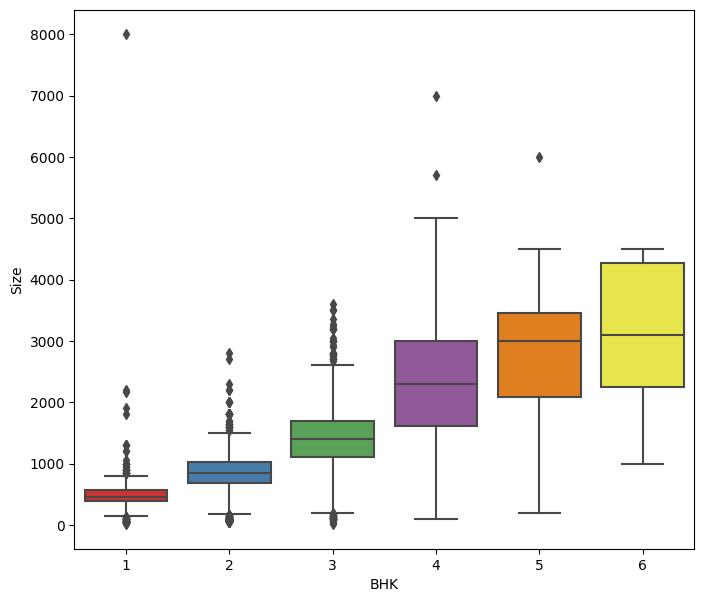

In [136]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.boxplot(data=initialRentData, x='BHK', y='Size', palette='Set1', ax=ax)
plt.show()

#As per the above graph, we can see when the size getting increased, BHK increasing too
#And we can see some outliers as well, therefore, this column needs to modify

In [29]:
#As we can see the distribution of the size (std) is 629.57 which is not normal
# Therefore, let's scale the size column using minmax scaler


scaler = MinMaxScaler()
rentData['Size'] = scaler.fit_transform(rentData[['Size']])

In [30]:
rentData.head()
#Size column has scaled as below due to the abnormal behavior

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,0.136421,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,0.098874,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,0.123905,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,0.098874,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,0.105131,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [31]:
#Statistical data of the Size column
rentData['Size'].describe()

#Abnormal distribution has reduced

count    4738.000000
mean        0.119601
std         0.078795
min         0.000000
25%         0.067584
50%         0.105131
75%         0.148936
max         1.000000
Name: Size, dtype: float64

# Col5 - Floor

In [32]:
rentData['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    349
2 out of 3         312
2 out of 4         307
1 out of 3         292
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 479, dtype: int64

In [33]:
#Statistical data of the Floor column
rentData['Floor'].describe()

count           4738
unique           479
top       1 out of 2
freq             379
Name: Floor, dtype: object

In [34]:
#As per the above result, there are 479 unique values
#therefore, we need to preprocess the values to give some meaningful values

In [35]:
#Function to get the living floor from the floor column values
#Existing values are like -> 2, 9 out of 9, Ground, Ground out of 1 Upper Basement out of 16, Lower Basement out of 2

def set_livingFloor(inpt):
    if inpt == 'Ground':
        return 0
    else:
        segs = inpt.split()
        if len(segs) > 0:
            if segs[0] == 'Upper':
                return -1
            elif segs[0] == 'Lower':
                return -2
            elif segs[0] == 'Ground':
                return 0
            else:
                return segs[0]
        else:
            return segs

In [36]:
#Function to get the total floors of the house/apt/building from the floor column values
#Existing values are like -> 2, 9 out of 9, Ground, Ground out of 1 Upper Basement out of 16, Lower Basement out of 2

def set_totalFloors(inpt):
    if inpt == 'Ground':
        return 0
    else:
        segs = inpt.split()
        if len(segs) > 0:
            return segs[-1]
        else:
            return segs

In [37]:
rentData.shape

(4738, 11)

In [38]:
rentData.head(10)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,0.136421,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,0.098874,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,0.123905,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,0.098874,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,0.105131,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2,7000,0.073842,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2,10000,0.086358,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,1,5000,0.030038,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2,26000,0.098874,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2,10000,0.123905,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [39]:
#create a new column as 'Living floor' by using the above created function

rentData['Living floor'] = rentData['Floor'].apply(set_livingFloor)

#create a new column as 'Total floors' by using the above created function

rentData['Total floors'] = rentData['Floor'].apply(set_totalFloors)

In [40]:
rentData.shape

(4738, 13)

In [47]:
rentData.head(10)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Living floor,Total floors
0,2,10000,0.136421,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,0.098874,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,0.123905,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,0.098874,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,0.105131,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
5,2,7000,0.073842,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,1
6,2,10000,0.086358,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent,0,4
7,1,5000,0.030038,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent,1,2
8,2,26000,0.098874,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent,1,2
9,2,10000,0.123905,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,1,3


In [48]:
rentData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4738 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4738 non-null   int64  
 1   Rent               4738 non-null   int64  
 2   Size               4738 non-null   float64
 3   Floor              4738 non-null   object 
 4   Area Type          4738 non-null   object 
 5   Area Locality      4738 non-null   object 
 6   City               4738 non-null   object 
 7   Furnishing Status  4738 non-null   object 
 8   Tenant Preferred   4738 non-null   object 
 9   Bathroom           4738 non-null   int64  
 10  Point of Contact   4738 non-null   object 
 11  Living floor       4738 non-null   object 
 12  Total floors       4738 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 518.2+ KB


In [49]:
#Still the newly created 02 columns are in object type, so let's convert it to numeric values

rentData['Living floor'] = rentData['Living floor'].astype('int32')
rentData['Total floors'] = rentData['Total floors'].astype('int32')

In [50]:
rentData.info()
#now we can see, those 02 columns has convereted to the int32 type

<class 'pandas.core.frame.DataFrame'>
Index: 4738 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4738 non-null   int64  
 1   Rent               4738 non-null   int64  
 2   Size               4738 non-null   float64
 3   Floor              4738 non-null   object 
 4   Area Type          4738 non-null   object 
 5   Area Locality      4738 non-null   object 
 6   City               4738 non-null   object 
 7   Furnishing Status  4738 non-null   object 
 8   Tenant Preferred   4738 non-null   object 
 9   Bathroom           4738 non-null   int64  
 10  Point of Contact   4738 non-null   object 
 11  Living floor       4738 non-null   int32  
 12  Total floors       4738 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 481.2+ KB


In [51]:
#So, let's drop the Floor column now which has 479 unique values

rentData = rentData.drop('Floor', axis=1)

In [52]:
rentData.head(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Living floor,Total floors
0,2,10000,0.136421,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,0.098874,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,0.123905,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3


# Col6 - Area Type

In [53]:
rentData['Area Type'].value_counts()

Area Type
Super Area     2443
Carpet Area    2293
Built Area        2
Name: count, dtype: int64

In [54]:
#Out of 4000+ records, there are only 2 records for the Built Area values
#So let's remove those suspicios rows

rentData[rentData['Area Type'] == 'Built Area']

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Living floor,Total floors
3079,2,15000,0.123905,Built Area,"Chromepet, GST Road",Chennai,Furnished,Bachelors/Family,2,Contact Owner,1,2
3966,1,6000,0.061327,Built Area,Seri Lingampally,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner,5,5


In [55]:
rentData.shape

(4738, 12)

In [56]:
rentData.drop(3966, axis=0, inplace=True)
rentData.drop(3079, axis=0, inplace=True)

In [57]:
rentData.shape

(4736, 12)

# Col7 - Area Locality

In [58]:
rentData['Area Locality'].value_counts()

Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Miyapur, NH 9                              22
Velachery                                  22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: count, Length: 2233, dtype: int64

In [61]:
rentData.shape

(4736, 12)

In [62]:
#As per the above result, there are 2233 unique values for this column
#And there are very low counts considering the total dataset records

#therefore, we have to remove this column to reduce the impact for the model
rentData.drop('Area Locality', inplace=True, axis=1)

In [63]:
rentData.shape

(4736, 11)

# Col8 - City

In [64]:
rentData['City'].value_counts()

City
Mumbai       969
Chennai      890
Bangalore    885
Hyderabad    866
Delhi        604
Kolkata      522
Name: count, dtype: int64

#Each city contain enough data records and only having 6 unique values, therefore no need of feature engineering

# Col9 - Furnishing Status

In [65]:
rentData['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2246
Unfurnished       1813
Furnished          677
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x185f35e8a10>,
 [Text(0.08873649413408417, 1.0964149919664505, 'Unfurnished'),
  Text(-0.5569217494312602, -0.9485979996871302, 'Semi-Furnished'),
  Text(0.9904330694567622, -0.47858367599246054, 'Furnished')],
 [Text(0.048401724073136816, 0.5980445410726093, '47.43%'),
  Text(-0.30377549968977824, -0.5174170907384347, '38.24%'),
  Text(0.5402362197036884, -0.26104564145043296, '14.33%')])

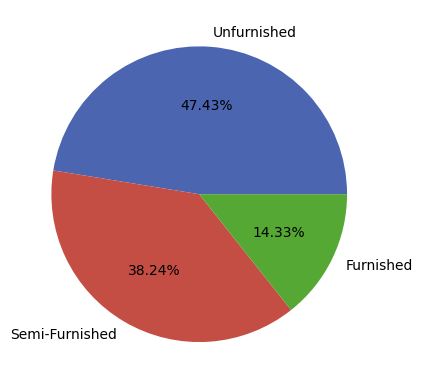

In [135]:
plt.pie(initialRentData['Furnishing Status'].value_counts(), labels=initialRentData['Furnishing Status'].unique(), 
        autopct='%1.2f%%', colors=colors)

#Each Furnishing Status contain enough data records and only having 3 unique values, therefore no need of feature engineering

# Col10 - Tenant Preferred

In [66]:
rentData['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    3436
Bachelors            829
Family               471
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x185f204e050>,
 [Text(-0.716135409385136, 0.8349551337795246, 'Bachelors/Family'),
  Text(0.42481684305308487, -1.0146578979431495, 'Bachelors'),
  Text(1.0467456406646323, -0.3381176773692684, 'Family')],
 [Text(-0.3906193142100742, 0.4554300729706497, '72.57%'),
  Text(0.23171827802895537, -0.5534497625144451, '17.49%'),
  Text(0.5709521676352539, -0.18442782401960092, '9.95%')])

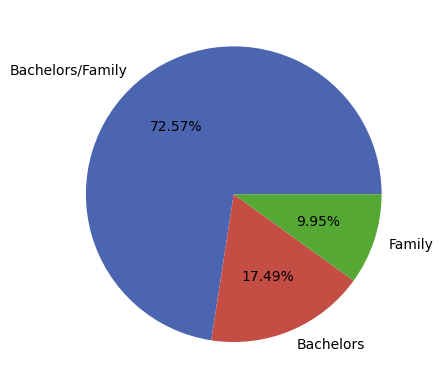

In [134]:
plt.pie(initialRentData['Tenant Preferred'].value_counts(), labels=initialRentData['Tenant Preferred'].unique(), 
        autopct='%1.2f%%', colors=colors)

#Each Tenant Preferred contain enough data records and only having 3 unique value, therefore no need of feature engineering

# Col11 - Bathroom

In [67]:
rentData['Bathroom'].value_counts()

Bathroom
2     2290
1     1470
3      747
4      153
5       60
6       12
7        3
10       1
Name: count, dtype: int64

In [72]:
rentData.shape

(4736, 11)

In [73]:
#As per the above result, we can see, there are low records for 7 and 10

rentData[rentData['Bathroom'] > 6]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Living floor,Total floors
2846,4,150000,0.499374,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,Contact Agent,3,3
4185,1,200000,1.000000,Super Area,Hyderabad,Unfurnished,Bachelors/Family,10,Contact Owner,0,4
4350,6,60000,0.349186,Super Area,Hyderabad,Furnished,Bachelors/Family,7,Contact Owner,0,3
4518,6,35000,0.424280,Super Area,Hyderabad,Unfurnished,Bachelors/Family,7,Contact Owner,0,2


In [74]:
#Therefore, need to remove those rows to get more accurate results from the model

rentData.drop(2846, axis=0, inplace=True)
rentData.drop(4185, axis=0, inplace=True)
rentData.drop(4350, axis=0, inplace=True)
rentData.drop(4518, axis=0, inplace=True)

In [75]:
rentData.shape

(4732, 11)

# Col12 - Point of Contact

In [76]:
rentData['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3207
Contact Agent      1524
Contact Builder       1
Name: count, dtype: int64

In [77]:
rentData.shape

(4732, 11)

In [78]:
#There is only one record exist for the Contact Builder, therefore it will impact for the model accuracy
#Let's remove that row

rentData[rentData['Point of Contact'] == 'Contact Builder']

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Living floor,Total floors
4061,1,5500,0.048811,Super Area,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Builder,1,2


In [79]:
rentData.drop(4061, axis=0, inplace=True)

rentData.shape

(4731, 11)

In [80]:
rentData.head(5)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Living floor,Total floors
0,2,10000,0.136421,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,0.098874,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,0.123905,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,0.098874,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,0.105131,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [81]:
rentData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4731 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4731 non-null   int64  
 1   Rent               4731 non-null   int64  
 2   Size               4731 non-null   float64
 3   Area Type          4731 non-null   object 
 4   City               4731 non-null   object 
 5   Furnishing Status  4731 non-null   object 
 6   Tenant Preferred   4731 non-null   object 
 7   Bathroom           4731 non-null   int64  
 8   Point of Contact   4731 non-null   object 
 9   Living floor       4731 non-null   int32  
 10  Total floors       4731 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 406.6+ KB


In [82]:
rentData.nunique

<bound method DataFrame.nunique of       BHK   Rent      Size    Area Type       City Furnishing Status   
0       2  10000  0.136421   Super Area    Kolkata       Unfurnished  \
1       2  20000  0.098874   Super Area    Kolkata    Semi-Furnished   
2       2  17000  0.123905   Super Area    Kolkata    Semi-Furnished   
3       2  10000  0.098874   Super Area    Kolkata       Unfurnished   
4       2   7500  0.105131  Carpet Area    Kolkata       Unfurnished   
...   ...    ...       ...          ...        ...               ...   
4741    2  15000  0.123905  Carpet Area  Hyderabad    Semi-Furnished   
4742    3  29000  0.249061   Super Area  Hyderabad    Semi-Furnished   
4743    3  35000  0.217772  Carpet Area  Hyderabad    Semi-Furnished   
4744    3  45000  0.186483  Carpet Area  Hyderabad    Semi-Furnished   
4745    2  15000  0.123905  Carpet Area  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  Living floor  Total floors  
0     Bachelors/Fami

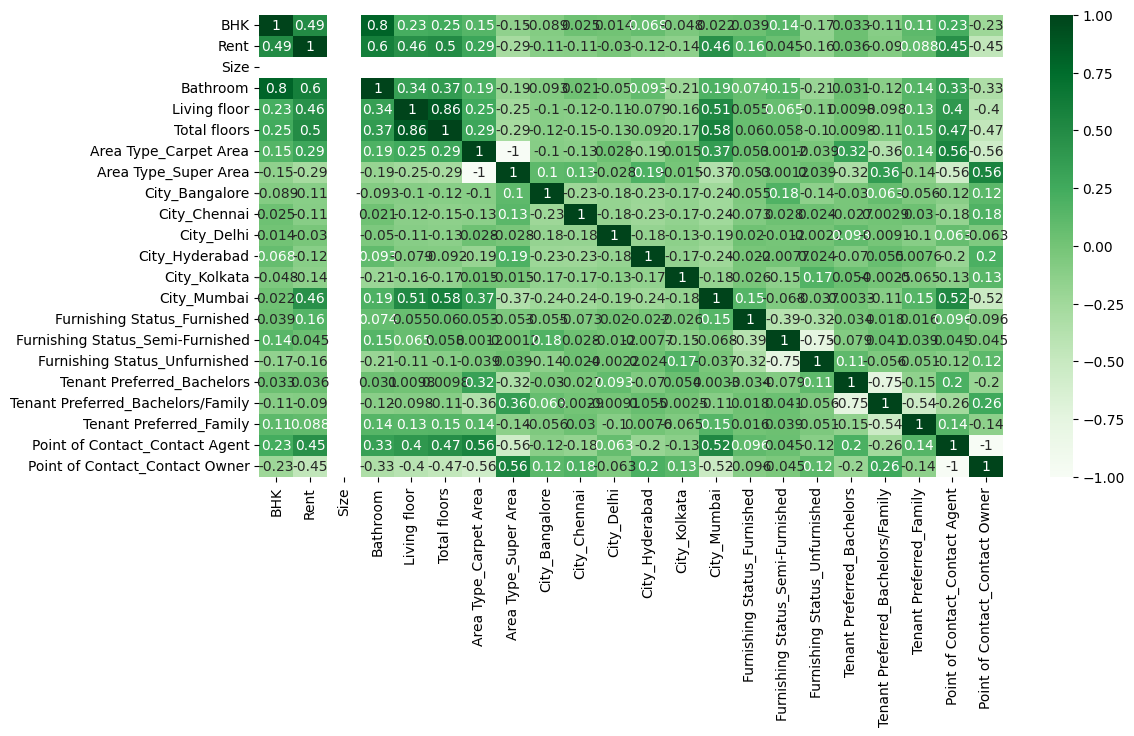

In [131]:
plt.figure(figsize=(12,6))

#Get an idea about co-relation of each attributes
sns.heatmap(rentData.corr(),annot=True,cmap='Greens')

#warmer colors give positive correlations and dark colors give negative correlations
plt.show()

# Modelling and Training

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [88]:
rentData.shape

(4731, 11)

In [89]:
rentData.head(5)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Living floor,Total floors
0,2,10000,0.136421,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,0.098874,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,0.123905,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,0.098874,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,0.105131,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [90]:
#keeping a copy
rentDataCopy = rentData.copy()

In [108]:
#we need to encode the remaining categorical values in order to start the testing
rentData = pd.get_dummies(rentData, dummy_na=False)

In [110]:
rentData = rentData.astype(int)

In [112]:
rentData.head()

,BHK,Rent,Size,Bathroom,Living floor,Total floors,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,...,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,2,10000,0,2,0,2,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
1,2,20000,0,1,1,3,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2,17000,0,1,1,3,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,2,10000,0,1,1,2,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
4,2,7500,0,1,1,2,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1


In [113]:
rentData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4731 entries, 0 to 4745
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BHK                                4731 non-null   int32
 1   Rent                               4731 non-null   int32
 2   Size                               4731 non-null   int32
 3   Bathroom                           4731 non-null   int32
 4   Living floor                       4731 non-null   int32
 5   Total floors                       4731 non-null   int32
 6   Area Type_Carpet Area              4731 non-null   int32
 7   Area Type_Super Area               4731 non-null   int32
 8   City_Bangalore                     4731 non-null   int32
 9   City_Chennai                       4731 non-null   int32
 10  City_Delhi                         4731 non-null   int32
 11  City_Hyderabad                     4731 non-null   int32
 12  City_Kolkata             

In [114]:
#Get the features without target variable
X = rentData.drop('Rent', axis=1)

#Get the target variable which we are going to predict
y = rentData['Rent']

#set 80% of data to train and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
X_train.shape, X_test.shape

((3784, 21), (947, 21))

#Model Training

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [117]:
#Train model via random forest and get the accuracy

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

accuracyRf = rf.score(X_test, y_test)

In [118]:
#Train model via decision tree and get the accuracy

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

accuracyDt = dt.score(X_test, y_test)

In [119]:
#Train model via Linear Regression and get the accuracy

lr = LinearRegression()
lr.fit(X_train, y_train)

accuracyLr = lr.score(X_test, y_test)

In [120]:
#random forest
print(str(rf)+ ' accuracy --> ' +str(accuracyRf))

#decision tree
print(str(dt)+ ' accuracy --> ' +str(accuracyDt))

#Linear Regression
print(str(lr)+ ' accuracy --> ' +str(accuracyLr))

RandomForestRegressor() accuracy --> 0.6652882876591613
DecisionTreeRegressor() accuracy --> 0.358687244722075
LinearRegression() accuracy --> 0.5839775536106453


# Hyperparameter Tunning

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

parameters = {'n_estimators':[10, 50, 100],
              'criterion':['squared_error','absolute_error','poisson']}
grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train, y_train)

#Assign the best model after hyperparameter tunning
enhanced_model = grid_fit.best_estimator_

#Accuracy after tunning
enhanced_model.score(X_test, y_test)

0.6722908662111298

In [123]:
enhanced_model.fit(X_train, y_train)

y_pred = enhanced_model.predict(X_test)

#calculating the r2 score which is coefficient of determination
#a metric used to evaluate the performance of regression models
r2_score(y_test, y_pred)

0.6835836676640819

In [124]:
#let's calculate the mean error which will give an idea about how the predict and actual values deviated
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

11967.212486800425

#As per the above error result, we can say, the rent that will predict via this model could be more or less from 11,967 Rs. which is a good avergae since the rent variation is very broad.